In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from itertools import cycle
cycol = cycle('bgrcmk')

In [3]:
def read_exp_res(exp_name):
    control_val = pd.read_csv('results/{0}/control_val_results.csv'.format(exp_name))
    utility_val = pd.read_csv('results/{0}/utility_classifier_val_results.csv'.format(exp_name))
    control_test = pd.read_csv('results/{0}/control_test_results.csv'.format(exp_name))
    utility_test = pd.read_csv('results/{0}/utility_classifier_test_results.csv'.format(exp_name))
    similarity_test = pd.read_csv('results/{0}/utility_similarity_test_results.csv'.format(exp_name))
    return control_val, utility_val, control_test, utility_test, similarity_test

In [55]:
def show_exp_res_tables(exp_name, df1, df2, df3, df4, df5, utility_metric, privacy_loss_metric):
    display("Ctrl Val", df1, "Ctrl Test", df3, "Utility Val", df2, "Utility Test", df4, "Sim Test", df5)
    df_acc = df4[['eps', utility_metric]]
    display("Test " + utility_metric, df_acc)

    df_loss = df5[df5['metric'] == privacy_loss_metric]
    display("All " + privacy_loss_metric, df_loss)

    df_loss_metric = df_loss[['eps', 'mean_all']]
    display("Mean " + privacy_loss_metric, df_loss_metric) 

In [56]:
def plot_exp_res(exp_name, df1, df2, df3, df4, df5, utility_metric, privacy_loss_metric):
    df_u = df4[['eps', utility_metric]]
    df_loss = df5[df5['metric'] == privacy_loss_metric]
    df_loss_metric = df_loss[['eps', 'mean_all']]

    x_u = df_u['eps']
    x_l = df_loss_metric['eps']
    y_u = df_u[utility_metric]
    y_l = df_loss_metric['mean_all']
    no_dp_legend = []
    if x_u[0] == "no_dp":
        x_u = x_u[1:]
        x_l = x_l[1:]
        x_u = np.array(x_u, dtype=int)
        x_l = np.array(x_l, dtype=int)
        plt.hlines(y_u[0], min(x_l), max(x_u), linestyle="dashed", colors=next(cycol))
        plt.hlines(y_l[0], min(x_l), max(x_u), linestyle="dashed", colors=next(cycol))
        no_dp_legend = [exp_name + "_gen_no_dp_" + utility_metric, exp_name + "_gen_no_dp_" + privacy_loss_metric]
        y_u = y_u[1:]
        y_l = y_l[1:]
    
    x_u = np.array(x_u, dtype=int)
    x_l = np.array(x_l, dtype=int)

    plt.plot(x_u, y_u, color=next(cycol))
    plt.plot(x_l, y_l, color=next(cycol))
    plt.xlabel("eps")
    return [exp_name + "_" + utility_metric, exp_name + "_" + privacy_loss_metric] + no_dp_legend



In [57]:
def process_res(exp_name, show_tables=False, utility_metric="acc", privacy_loss_metric = "hamming"):
    tables = read_exp_res(exp_name)
    if show_tables:
        show_exp_res_tables(exp_name, *tables, utility_metric, privacy_loss_metric)
    legend = plot_exp_res(exp_name, *tables, utility_metric, privacy_loss_metric)
    return legend

'exp_4_8'

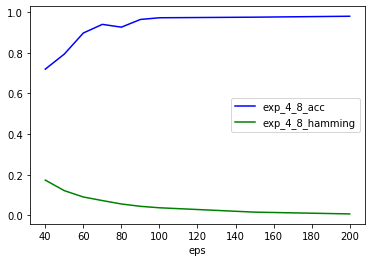

In [58]:
exps = ['exp_4_8']
plot_lengends = []
for exp_name in exps:
    display(exp_name)
    legend = process_res(exp_name)
    plot_lengends = plot_lengends + legend

plt.legend(plot_lengends)
plt.show()